# Quantum Computing 101 with Qiskit

- **신 소 영**
- Qiskit Advocate
- PhD. Candidate, Seoul National University
- Research Assistand, KIAS
- *OCT 14, 2020*

# 개요

- IBM Quantum Experience $ Qiskit
- 양자컴퓨팅의 기본 개념
    - 중첩
    - 측정
    - 얽힘
    - 양자 게이트
    - 간섭
    
- IBM Q Experience -> Circuit Composer


# IBM Quantum Experience

2016년 5월 4일, IBM은 모두가 사용할 수 있도록 양자컴퓨터를 클라우드에 배포하기 시작했습니다. 


<table><tr>
<td> <img src="figures/ibm_quantum_experience.png" alt="IBM Quantum Experience" style="width: 1800px;"/> </td>
<td>
IBM Q Experience는 현재:
    <ul>
        <li>200,000+ 사용자</li>
        <li>1800억 가지의 회로</li>
        <li>18개의 온라인 양자 컴퓨터 - 일반사용자에게는 두개의 시뮬레이터(Qasm, Armonk Pulse)를 포함해 9개</li>
        <li>100+ IBM Q Network 파트너</li>
        <li>200+ 논문</li>
    </ul>
</td>
</tr></table>



# Qiskit
![Qiskit elements](figures/qiskit_elements.png)

### Qiskit Terra: Circuit, Pulse, Transpiler, provider, Quantum_info, Visualization   
### Qiskit Aer: QasmSimulator, State Vector Simulator, Unitary Simulator   
### Qiskit Ignis: Circuit, Fitter, Filter
### Qiskit Aqua: Chemistry module, finance module, QML Module, Optimizing Module

# 양자 컴퓨팅의 기본 요소

- 중첩
- 측정
- 얽힘
- 양자게이트
- 간섭

## 중첩
중첩을 통해 $|0\rangle$과 $|1\rangle$이 함께 존재하는 생태를 만들 수 있습니다.

$$|\psi\rangle = a|0\rangle+b|1\rangle$$

<img src="figures/Schrodingers_cat.svg" alt="Schrodinger's cat" style="width: 1200px;"/>

### Import Qiskit

In [1]:
from qiskit import QuantumCircuit, execute # for creating and executing quantum circuits
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_histogram # for visualization
%config InlineBackend.figure_format = 'svg' # make images look nice
import qiskit.tools.jupyter # handy jupyter notebook tools
%qiskit_version_table # display versions of qiskit and its elements

### 양자 회로를 만들어 봅시다

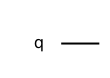

In [2]:
qc0 = QuantumCircuit(1) # create a quantum circuit with 1 qubit
qc0.draw('mpl') # visualize the circuit 

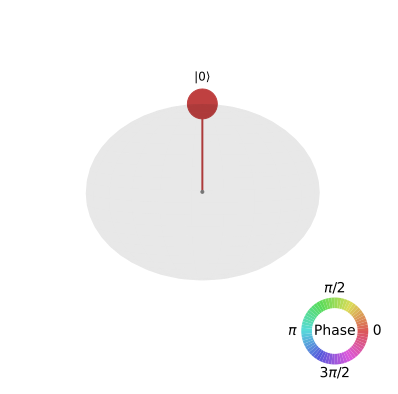

In [3]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector


state = Statevector.from_instruction(qc0)
#plot_bloch_multivector(state, title="New Bloch Multivector")
plot_state_qsphere(state) # visualize statevector in a qsphere

### Add quantum gates

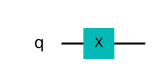

In [45]:
qc1 = QuantumCircuit(1)
qc1.x(0) # apply X gate to qubit 0
qc1.draw('mpl')

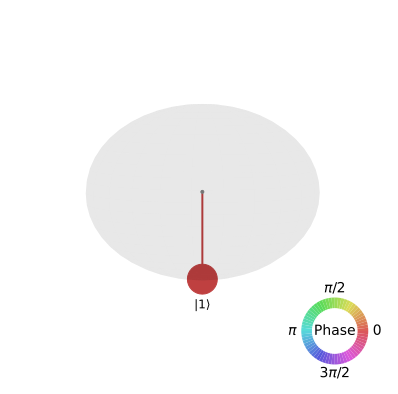

In [46]:
state1 = Statevector.from_instruction(qc1)

#plot_bloch_multivector(state1)
plot_state_qsphere(state1)

### 중첩 만들기

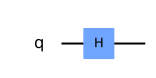

In [47]:
qc2 = QuantumCircuit(1)
qc2.h(0) # apply Hadamard gate to qubit 0
qc2.draw('mpl')

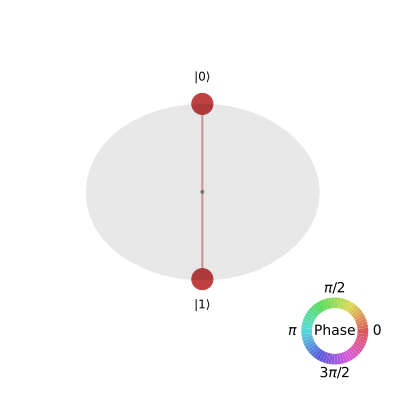

In [48]:
state2 = Statevector.from_instruction(qc2)
#plot_bloch_multivector(state2)
plot_state_qsphere(state2)

## 측정
측정은 큐빗이 확률에 따라 $|0\rangle$이나 $|1\rangle$로 결정되게 합니다.

다음과 같은 상태에서 $|\psi\rangle = a|0\rangle+b|1\rangle$:

- $|a|^2$ 는 큐빗이 $|0\rangle$ 으로 측정될 확률이며
- $|b|^2$ 는 큐빗이 $|1\rangle$ 로 측정될 확률입니다.

![Schrodinger cat measurement](figures/schrodingers_cat_measurement.png)

### 양자회로에 측정을 추가하기

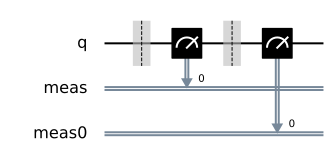

In [49]:
qc0.measure_all() # measure all qubits and store the result in classical bits
qc0.draw('mpl')

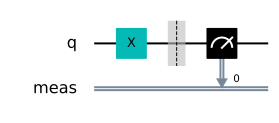

In [50]:
qc1.measure_all()
qc1.draw('mpl')

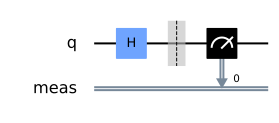

In [51]:
qc2.measure_all()
qc2.draw('mpl')

### 측정의 통계

In [37]:
from qiskit.providers.aer import QasmSimulator # QasmSimulator micmic beheaviour of real devices

# real devices require multiple execution (shots, default=1024) to obtain outcome statistics
counts0 = execute(qc0, QasmSimulator(), shots=5000).result().get_counts()
counts1 = execute(qc1, QasmSimulator(), shots=5000).result().get_counts()
counts2 = execute(qc2, QasmSimulator(), shots=5000).result().get_counts()
print(counts0, counts1, counts2) 

{'0': 5000} {'1': 5000} {'0': 2505, '1': 2495}


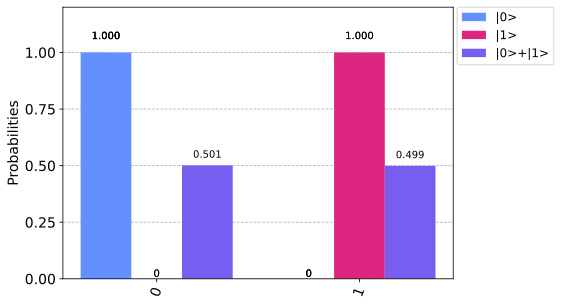

In [38]:
plot_histogram([counts0, counts1, counts2], legend=['|0>','|1>','|0>+|1>']) # visualize outcome statistics

## 얽힘
얽힘은 두개나 그 이상의 큐빗의 상태가 더이상 독립적이지 않게 만듭니다.

<center><img src="figures/quantum_entanglement.jpg" alt="Quantum entanglement" style="width: 1000px;"/></center>

### 2개의 큐빗의 하다마드

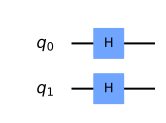

In [39]:
qc3 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc3.h(0)
qc3.h(1)
qc3.draw('mpl')

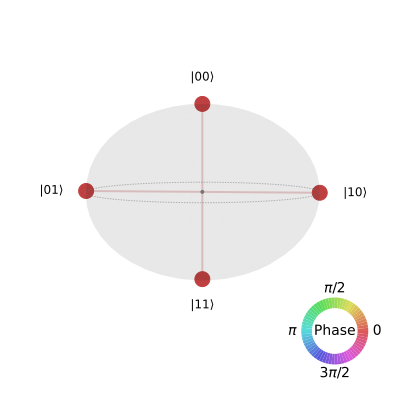

In [65]:
state3 = Statevector.from_instruction(qc3)

#plot_bloch_multivector(state3)
plot_state_qsphere(state3)

### Bell state $|\phi\rangle = 1 / \sqrt{2}(|00\rangle + |11\rangle)$ 

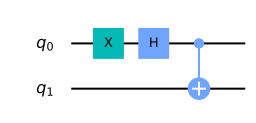

In [62]:
qc4 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc4.x(0)
qc4.h(0)
qc4.cx(0,1) # apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc4.draw('mpl')

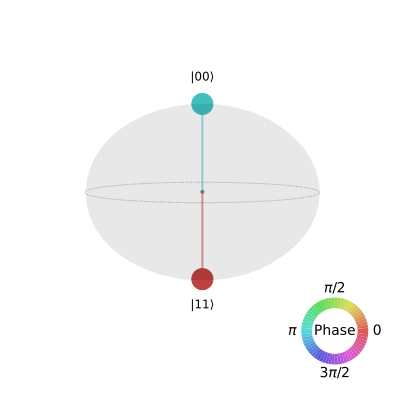

In [64]:
#state4 = execute(qc4, StatevectorSimulator()).result().get_statevector()
state4 = Statevector.from_instruction(qc4)


#plot_bloch_multivector(state4)
plot_state_qsphere(state4)

### Measurement statistics for Bell state

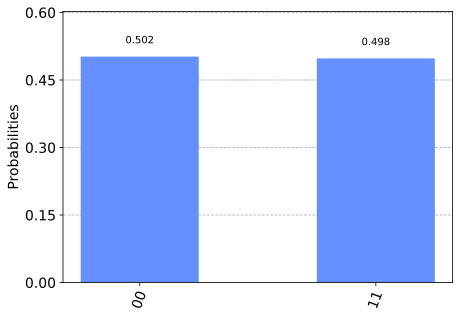

In [61]:
qc4.measure_all()
counts4 = execute(qc4, QasmSimulator()).result().get_counts()
plot_histogram(counts4)

## Quantum gates
Quantum gates perform the basic computational operations on qubits (think of as counterparts to classical and, +, and so on).

![Quantum gates](figures/quantum_gates.png)

- [Quantum instruction glossary](https://quantum-computing.ibm.com/docs/circ-comp/q-gates)
- [Circuit Composer (IBM Quantum Experience)](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Quantum Computing for Finance
- [IBM Institute for Business Value](https://www.ibm.com/thought-leadership/institute-business-value/report/exploring-quantum-financial)
- [Quantum computing for Finance: state of the art and future prospects](https://arxiv.org/abs/2006.14510), IBM Quantum, arXiv:2006.14510

## Qiskit education resources
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Coding with Qiskit series](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [1 Minute Qiskit](https://www.youtube.com/watch?v=GuppGy50dQ4&list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)
- [Qiskit Live: Circuit Sessions](https://www.youtube.com/watch?v=Omv-bPvQ3E8&list=PLOFEBzvs-VvrRlVz7wqaqmaMZj_ZK2Afe)
- [Qiskit Live: Seminar Series](https://www.youtube.com/watch?v=iKgysY097Ok&list=PLOFEBzvs-Vvr0uEoGFo08n4-WrM_8fft2)


## Qiskit community
- [Qiskit Twitter](https://twitter.com/qiskit)
- [Qiskit Slack](http://ibm.co/joinqiskitslack)

### Coding with Qiskit

In [19]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/a1NZC5rqQD8", width=1200, height=675)

### 1 Minute Qiskit

In [20]:
IFrame(src="https://www.youtube.com/embed/GuppGy50dQ4", width=1200, height=675)

### Qiskit Live: Circuit Sessions

In [21]:
IFrame(src="https://www.youtube.com/embed/Omv-bPvQ3E8", width=1200, height=675)

### Qiskit Live: Seminar Series

In [22]:
IFrame(src="https://www.youtube.com/embed/iKgysY097Ok", width=1200, height=675)